In [1]:
import os

import numpy as np
import h5py as h5

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import ion_plot_definitions as ipd

import plotting_tools as pt 
import spec_helper_functions as shf

import seaborn as sns
sns.set_style("ticks",{'axes.grid': True, "ytick.major.size": 0.1,
                "ytick.minor.size": 0.05,
                'grid.linestyle': '--'
            })

anisd 10 face
anisd 10 edge_theta0
anisd 10 edge_theta1.0
anisd 10 edge_theta1.5
anisd 20 face
ERROR NO VPMODEL FITS FILE
ERROR NO VPMODEL FITS FILE
ERROR NO VPMODEL FITS FILE
ERROR NO VPMODEL FITS FILE
anisd 20 edge_theta0
anisd 20 edge_theta1.0
anisd 20 edge_theta1.5


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-1e56f22f9a6c>", line 17, in <module>
    vv, flux, vvfit, fluxfit,  wl, wlfit, w0 = shf.load_velocity_data(ion, orientation, model, time, radius)
  File "/Users/irynabutsky/Dropbox/SyntheticSpecCGM/ENZO/scripts/plotting/spec_helper_functions.py", line 29, in load_velocity_data
  File "/Users/irynabutsky/Dropbox/SyntheticSpecCGM/ENZO/scripts/plotting/spec_helper_functions.py", line 41, in load_spec_from_fits
  File "/anaconda3/lib/python3.5/site-packages/astropy/utils/decorators.py", line 711, in __get__
  File "/anaconda3/lib/python3.5/site-packages/astropy/io/fits/hdu/image.py", line 243, in data
  File "/anaconda3/lib/python3.5/site-packages/astropy/io/fits/hdu/image.py", line 709, in _get_scaled_image_data
  File "/anaconda3/lib/python3.5/site-packages/astropy/io/fits

OSError: [Errno 24] Too many open files

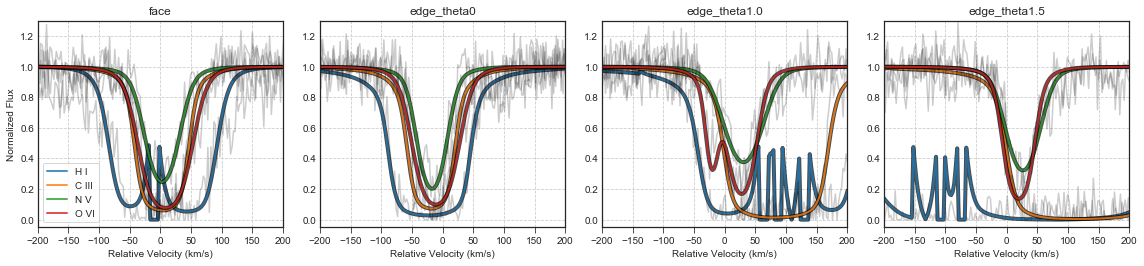

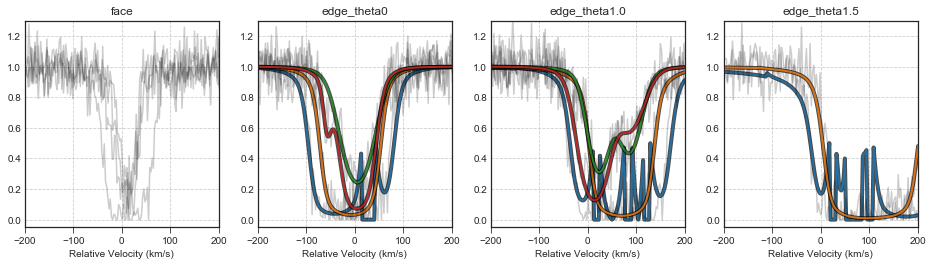

In [3]:
orientation = 'face'
#orientation = 'edge_theta0'
radius = 30
radius_list = np.arange(10, 50, 10)
model_list = ['anisd']
orientation_list = ['face', 'edge_theta0', 'edge_theta1.0', 'edge_theta1.5']
time = 11.2
ion_list = ['H I', 'C II', 'C III', 'Si II', 'Si III', 'Si IV', 'N III', 'N V', 'O VI']
ion_list = ['H I', 'C III', 'N V', 'O VI']

for model in model_list:
    for radius in radius_list:
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3.8))
        for orientation, ax in zip(orientation_list, axes):
            print(model, radius, orientation)
            for ion in ion_list:
                vv, flux, vvfit, fluxfit,  wl, wlfit, w0 = shf.load_velocity_data(ion, orientation, model, time, radius)
                ax.plot(vv, flux, color = 'black', alpha = 0.2)
                base = shf.spec_base_filename(orientation, model, time, radius)
                if os.path.isfile('../../data/analyzed_spectra/%s/FitInspection.fits'%(base)):
                    ax.plot(vvfit, fluxfit, color = 'black', linewidth = 4, alpha = 0.7)
                    ax.plot(vvfit, fluxfit, label = ion, linewidth = 2, alpha = 0.8)
                ax.set_xlim(-200, 200)
                ax.set_ylim(-0.05, 1.3)
                ax.set_title(orientation)
                ax.set_xlabel('Relative Velocity (km/s)')
        axes[0].set_ylabel('Normalized Flux')
        axes[0].legend(frameon = True)
        fig.tight_layout()
        plt.savefig('../../plots/velocity/%s_%ikpc.png'%(model, radius), dpi = 300)
#plt.savefig('../plots/finesst.png', dpi = 300, fontsize = 12)

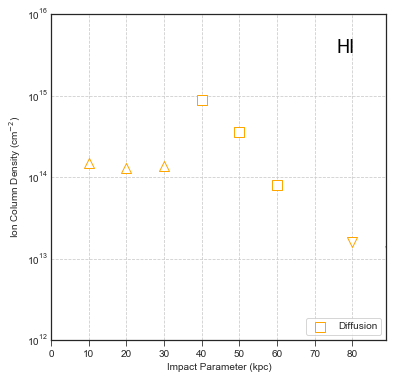

In [2]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_ylim(5e12, 1e15)
ax.set_xlim(0, 80)

pt.plot_data_scatter('HI', ax = ax, color = 'orange', orientation = 'face', model = 'anisd', \
                     label = 'Diffusion', marker_size = 100)

ax.legend(loc = 'lower right', frameon = True)
# note: why so few HI data points?

In [18]:
np.mean([])

/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

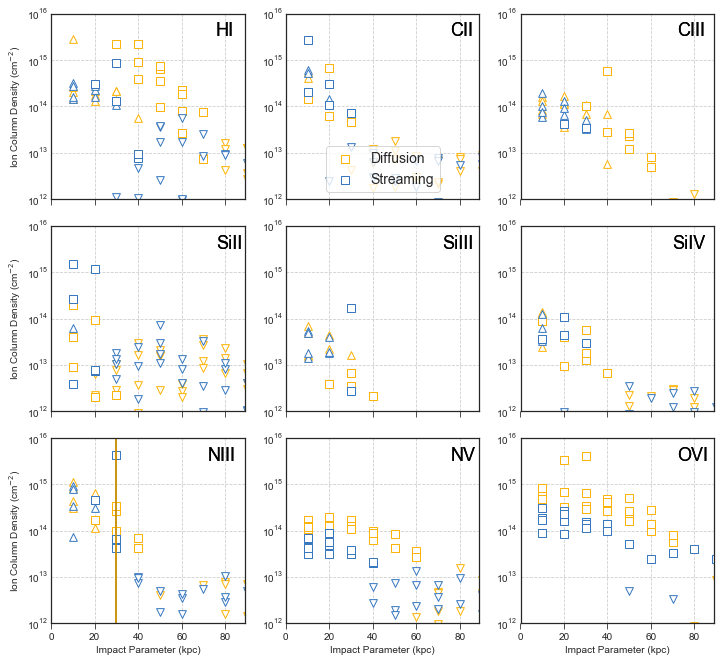

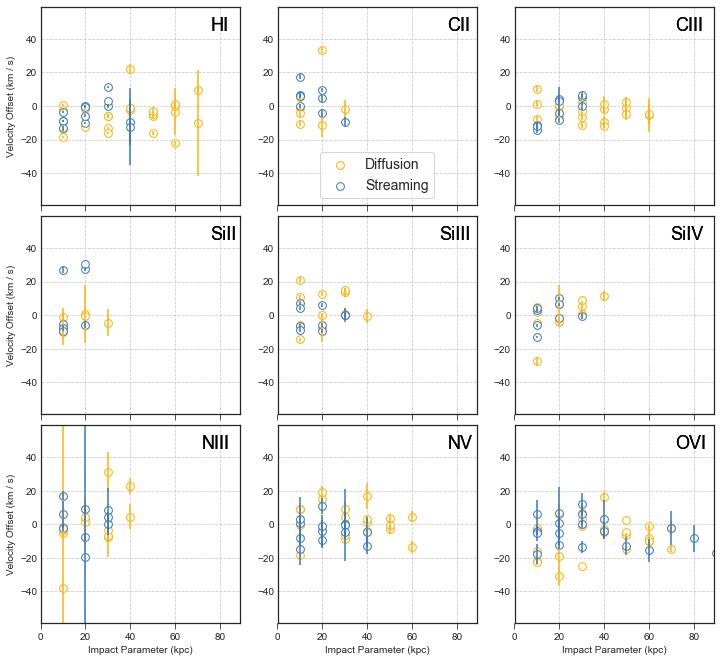

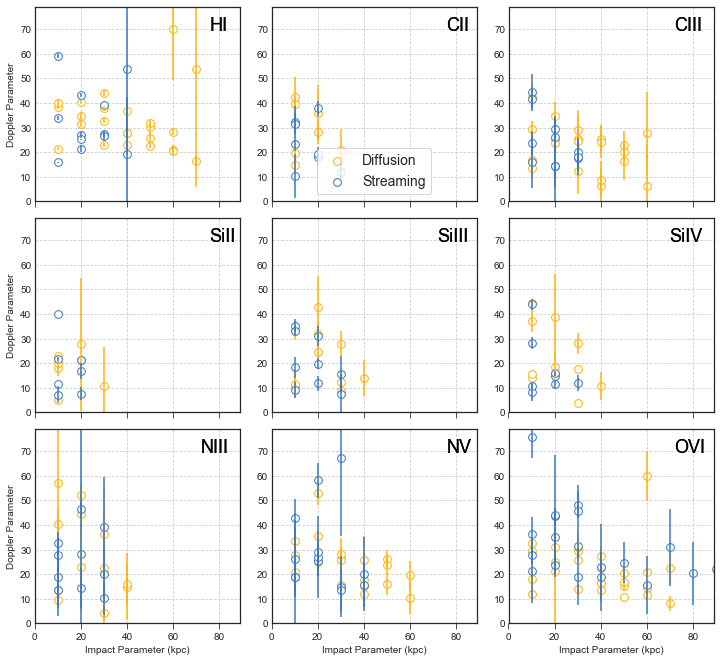

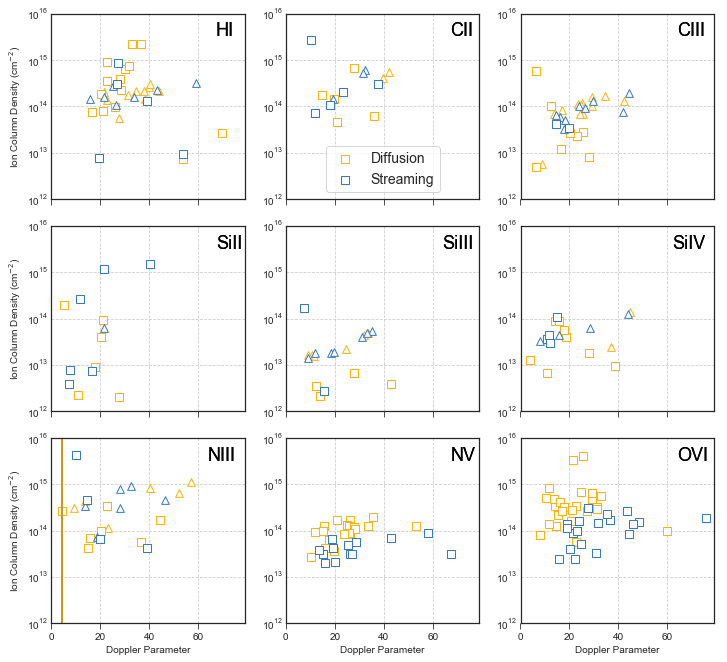

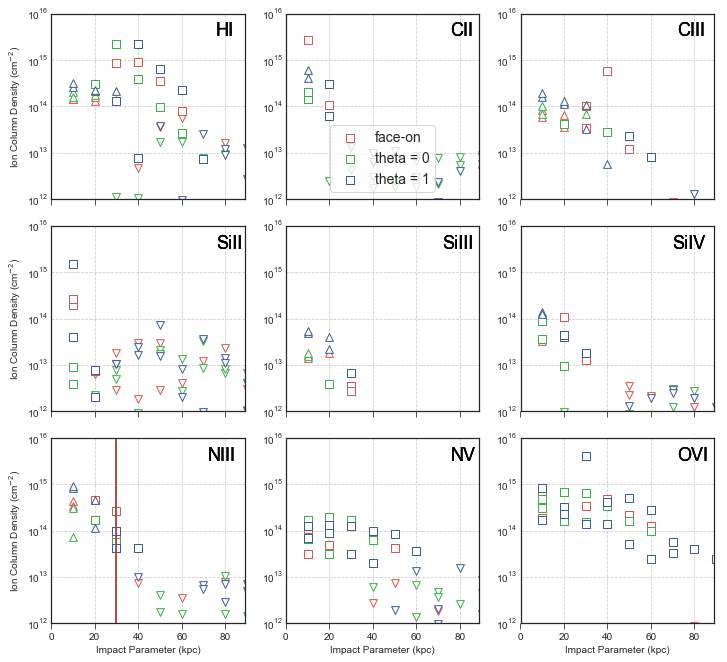

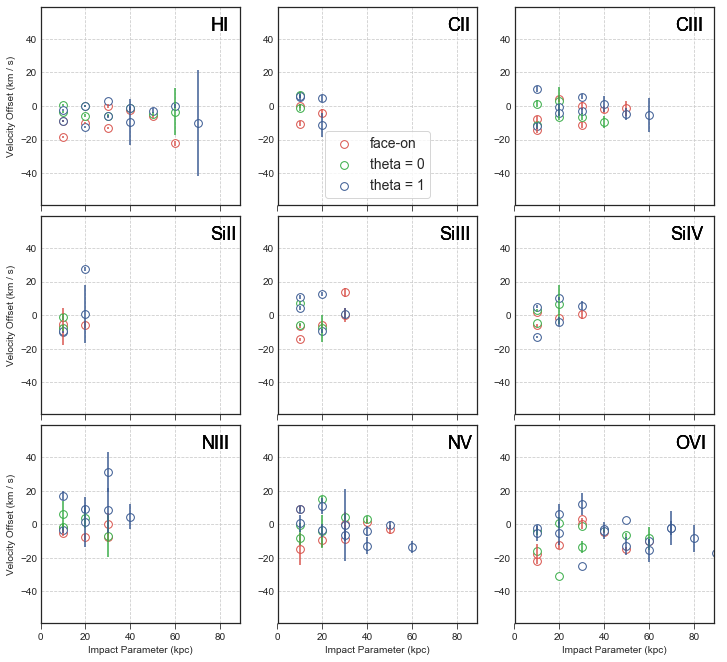

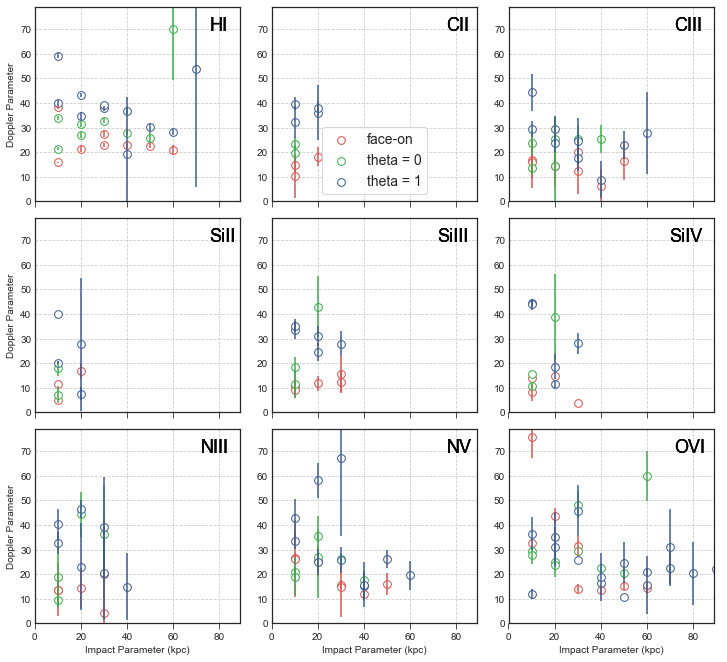

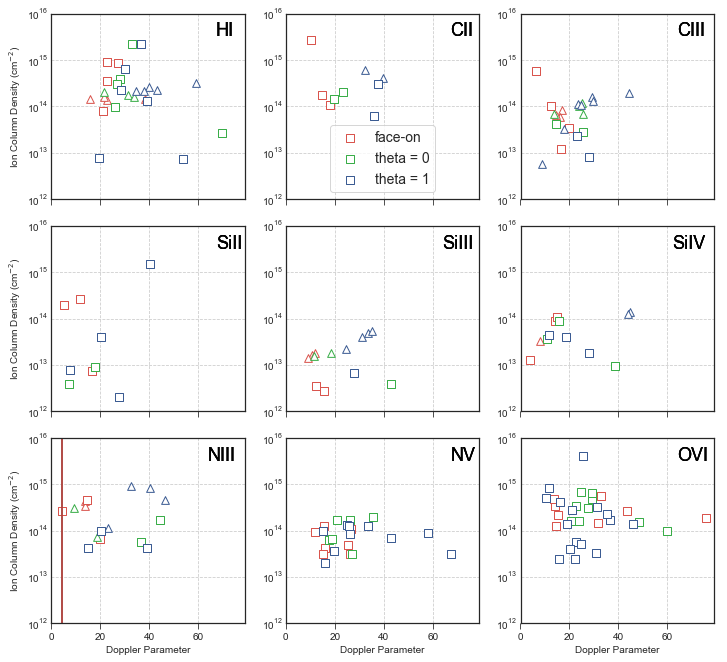

In [3]:
ion_list = ['H I', 'C II', 'C III', 'Si II', 'Si III', 'Si IV', 'N III', 'N V', 'O VI']
#ion_list = ['H I', 'O VI', 'N V']

xfields = ['impact', 'impact', 'impact', 'bval']
yfields = ['col', 'vel', 'bval', 'col']


for compare in ['model', 'orientation']:
    for xfield, yfield in zip(xfields, yfields):
        fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(3.4*3, 3.1*3), sharex = True, sharey = False)
        figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = xfield, yfield = yfield, nrows = 3, compare = compare, \
                                           fig = fig, ax = ax, marker_size = 60, set_ylim = True)

        ax[0][1].legend(loc = 'lower center', fontsize = 14, frameon = True)
        plt.savefig('../../plots/%s_%s_%s.png'%(xfield, yfield, compare), dpi = 300)




In [ ]:
#ion_list = ['C II', 'Si III', 'Si IV', 'C IV']
ncols = 3
orientation_list = ['edge_theta1.5', 'edge_theta1.0', 'edge_theta0']
radius_list = [10, 20, 10]
model_list = ['anisd',  'anisd', 'anisd']
#xlims = [(-200, 300), (-200, 300), (-200, 300)]
#radius = 10 
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(4*ncols, 3), sharey = True)
for ion in ion_list:
    for i in range(ncols):
        radius = radius_list[i]
        vv, flux, vvfit, fluxfit,  wl, wlfit, w0 = load_data(orientation_list[i], model_list[i], radius, ion)
        if(ion != 'Si IV'):
            ax[i].plot(vv, flux, color = 'black', alpha = 0.2)
        ax[i].plot(vvfit, fluxfit, color = 'black', linewidth = 4, alpha = 0.7)
        ax[i].plot(vvfit, fluxfit, label = ion, linewidth = 2, alpha = 0.8)
        ax[i].set_xlim(-190, 290)
        ax[i].set_ylim(-0.05, 1.3)
        ax[i].set_xlabel('Relative Velocity (km/s)')
ax[0].set_ylabel('Normalized Flux')
ax[1].legend()
fig.tight_layout()
plt.savefig('../plots/finesst.png', dpi = 300, fontsize = 12)